## <center><font face="STCAIYUN" color=LightSeaGreen>作业：自己找一个数据计算单组数据的位置参数置信区间估计</font>

### 数据描述
内房股，顾名思义，就是内资房地产股，在内地经营且已经上市的房地产公司（的股票），在股票大盘和股评中常常会使用到。
本数据来源于通达信，数据获取日期为2021.8.9，共130行观测值，主要指标有股票代码、企业名称、股票现价、所属细分行业、股票上市日期、H股市值(亿)、总资产(亿)、流通市值(亿)和总市值(亿)，其中股票现价、H股市值、总资产、流通市值和总市值均是连续型数值变量，其余是分类变量。

### 分析方法
顺序统计量的中位数置信区间、对称分布中用Walsh平均法求解置信区间；基于方差估计法的正态置信区间估计、枢轴量置信区间估计、分位数置信区间估计(95%)

### 实验内容
（1）计算出2021年内房股数据中**H股**和**总资产**两个变量的中位数置信区间

（2）观察用不同方法所得到的中位数区间的异同，进而比较不同计算方法的优劣

### 分析过程

In [1]:
# 读入数据
library(MASS)
library(readxl)
library(stringr)
data = read_excel('D://nonparametric//各章数据//2021港股内地房地产股票.xlsx')
head(data)

代码,名称,现价,细分行业,上市日期,H股,总资产,流通市值,总市值
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
28,天安,4.470,地产,19870318,14.80,426.21,66.16,66.16
29,达力集团,12.200,地产,19800104,2.38,26.61,29.00,29.00
59,天誉置业,0.890,地产,19931116,84.46,290.62,75.17,75.17
95,绿景中国地产,1.830,地产,20051202,50.98,742.67,93.29,93.29
106,朗诗地产,0.435,地产,19860324,47.22,247.01,20.54,20.54
108,国锐地产,1.010,地产,19730209,31.99,67.02,32.31,32.31


In [63]:
# 顺序统计量的中位数置信区间
dta = data$现价
alpha = 0.05
n = length(dta)
conf = pbinom(n,n,0.5)-pbinom(0,n,0.5)
for (k in 1:n){
    conf = pbinom(n-k,n,0.5)-pbinom(k-1,n,0.5)
    if (conf<1-alpha){
        loc = k-1
        break
    }
}

dta.sort = sort(dta) 
low = dta.sort[loc+1]
up = dta.sort[n-loc]
dta.median = median(dta)
print(sprintf('真实的中位数：%0.2f',dta.median))
print(sprintf('置信区间：(%0.2f , %0.2f)',low,up))

[1] "真实的中位数：1.92"
[1] "置信区间：(1.49 , 2.48)"


Warning message in ks.test(dta, pnorm, mean(dta), sd(dta)):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  dta
D = 0.25125, p-value = 1.49e-07
alternative hypothesis: two-sided


[1] "真实的中位数：1.92"
[1] "置信区间：(2.63 , 2.78)"


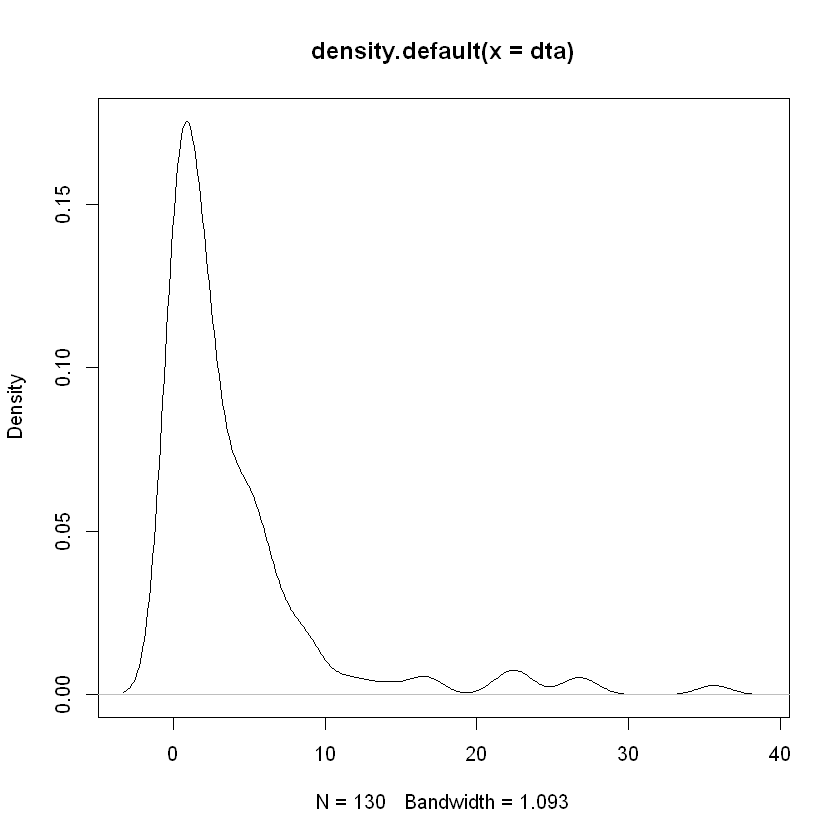

In [40]:
# 对称分布中用Walsh平均法求解置信区间
plot(density(dta)) # 画图
ks.test(dta,pnorm,mean(dta),sd(dta)) # 正态分布检验

walsh = NULL
for (i in 1:n){
    for (j in i:n){
        walsh = c(walsh,(dta[i]+dta[j])/2)
    }
}
nn = length(walsh)
for (k in seq(1,nn/2,1)){
    F = pbinom(nn-k,nn,0.5) - pbinom(k-1,nn,0.5)
    if (F<1-alpha){
        loc2 = k-1
        break
    }
}

walsh.sort = sort(walsh) 
low1 = walsh.sort[loc2+1]
up1 = walsh.sort[nn-loc2]
print(sprintf('真实的中位数：%0.2f',dta.median))
print(sprintf('置信区间：(%0.2f , %0.2f)',low1,up1))

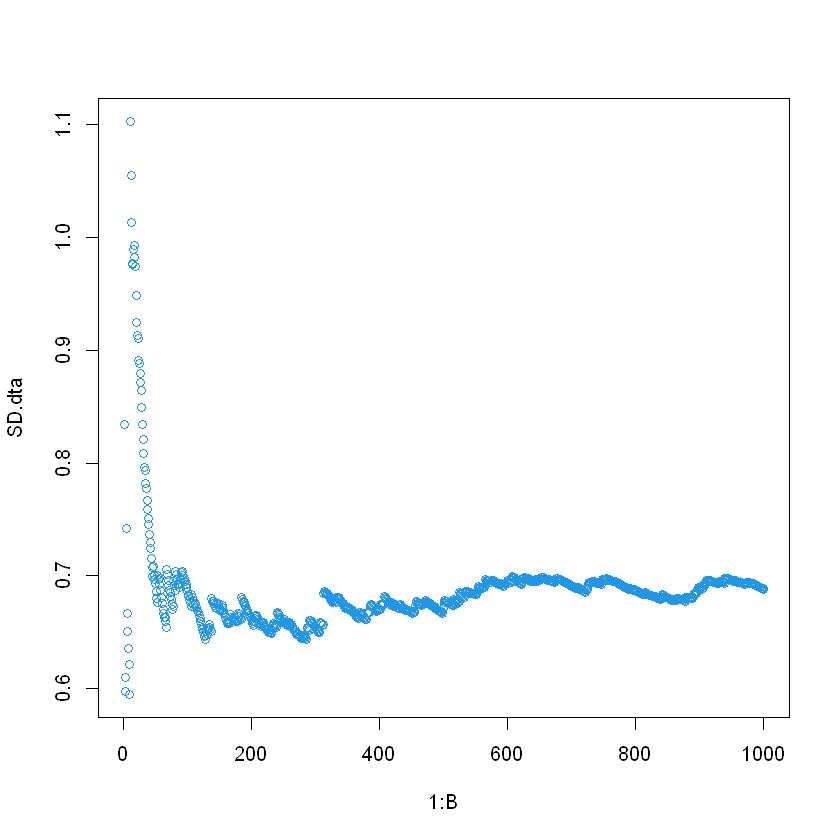

[1] "真实的中位数：1.92"
[1] "置信区间：(0.57 , 3.27)"


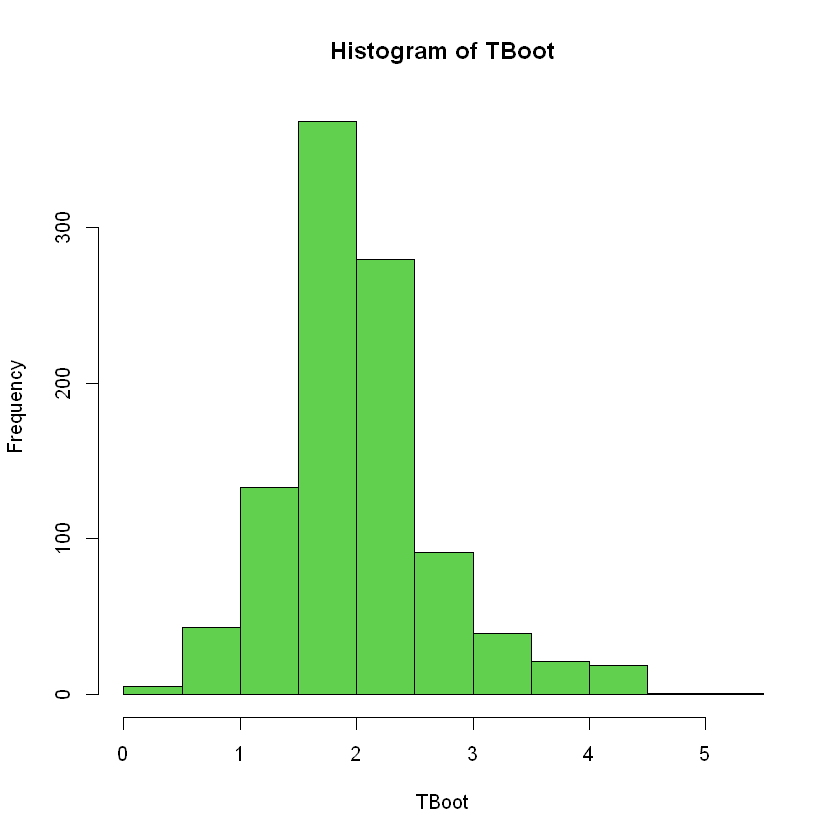

In [52]:
# 基于方差估计法的正态置信区间估计
# 使用bootstrap方法对中位数进行重抽样
TBoot = NULL
n = 30 # 每次bootstrap的样本量
B = 1000 # 次数
SD.dta = NULL
for (i in 1:B){
    Xsample = sample(dta, n, T)
    Tboot = median(Xsample)
    TBoot = c(TBoot,Tboot)
    SD.dta = c(SD.dta,sd(TBoot))
}
SD.median.dta = sd(TBoot)
plot(1:B,SD.dta,col = 4) # 可以看到标准差大概是0.65
hist(TBoot, col = 3) # 中位数的估计抽样分布的右偏分布


low2 = dta.median+qnorm(alpha/2,0,1)* SD.median.dta
up2 = dta.median-qnorm(alpha/2,0,1)* SD.median.dta
print(sprintf('真实的中位数：%0.2f',dta.median))
print(sprintf('置信区间：(%0.2f , %0.2f)',low2,up2))

In [53]:
# 枢轴量置信区间估计
low3 = 2*dta.median-quantile(TBoot,1-alpha/2)
up3 = 2*dta.median-quantile(TBoot,alpha/2)
print(sprintf('真实的中位数：%0.2f',dta.median))
print(sprintf('置信区间：(%0.2f , %0.2f)',low3,up3))

[1] "真实的中位数：1.92"
[1] "置信区间：(-0.07 , 3.00)"


In [54]:
# 分位数置信区间估计
low4 = quantile(TBoot,alpha/2)
up4 = quantile(TBoot,1-alpha/2)
print(sprintf('真实的中位数：%0.2f',dta.median))
print(sprintf('置信区间：(%0.2f , %0.2f)',low4,up4))

[1] "真实的中位数：1.92"
[1] "置信区间：(0.84 , 3.91)"


In [65]:
# 结果汇总
print(sprintf('| 真实的中位数 |     %0.2f    |',dta.median))
print(sprintf('| 顺序统计量法 |(%0.2f , %0.2f)|',low,up))
print(sprintf('| 沃什平均值法 |(%0.2f , %0.2f)|',low1,up1))
print(sprintf('| 重采样正态法 |(%0.2f , %0.2f)|',low2,up2))
print(sprintf('| 重采样枢轴量 |(%0.2f, %0.2f)|',low3,up3))
print(sprintf('| 重采样分位数 |(%0.2f , %0.2f)|',low4,up4))

[1] "| 真实的中位数 |     1.92    |"
[1] "| 顺序统计量法 |(1.49 , 2.48)|"
[1] "| 沃什平均值法 |(2.63 , 2.78)|"
[1] "| 重采样正态法 |(0.57 , 3.27)|"
[1] "| 重采样枢轴量 |(-0.07, 3.00)|"
[1] "| 重采样分位数 |(0.84 , 3.91)|"



	One-sample Kolmogorov-Smirnov test

data:  dta
D = 0.25382, p-value = 1.062e-07
alternative hypothesis: two-sided



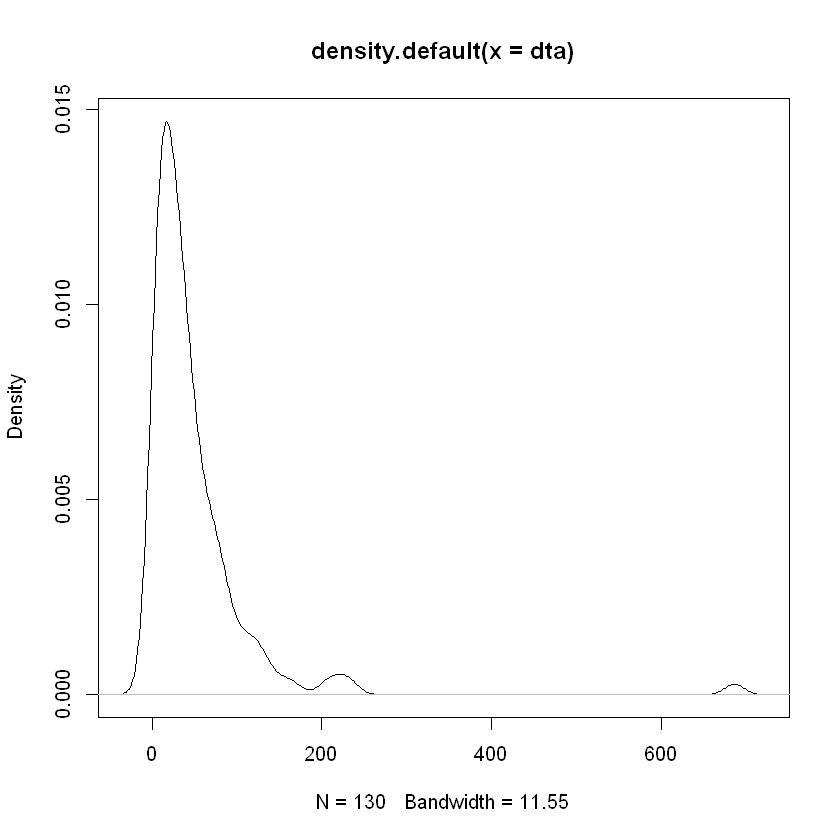

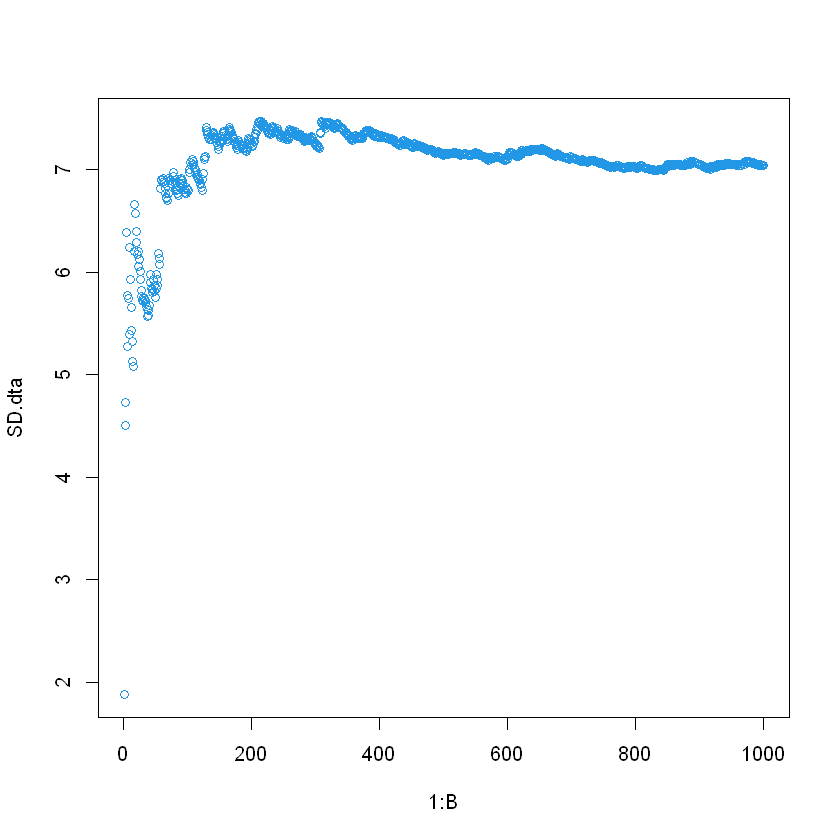

[1] "| 真实的中位数 |     31.34    |"
[1] "| 顺序统计量法 |(24.94, 37.13)|"
[1] "| 沃什平均值法 |(35.70, 37.18)|"
[1] "| 重采样正态法 |(17.54, 45.13)|"
[1] "| 重采样枢轴量 |(16.61, 44.46)|"
[1] "| 重采样分位数 |(18.21, 46.06)|"


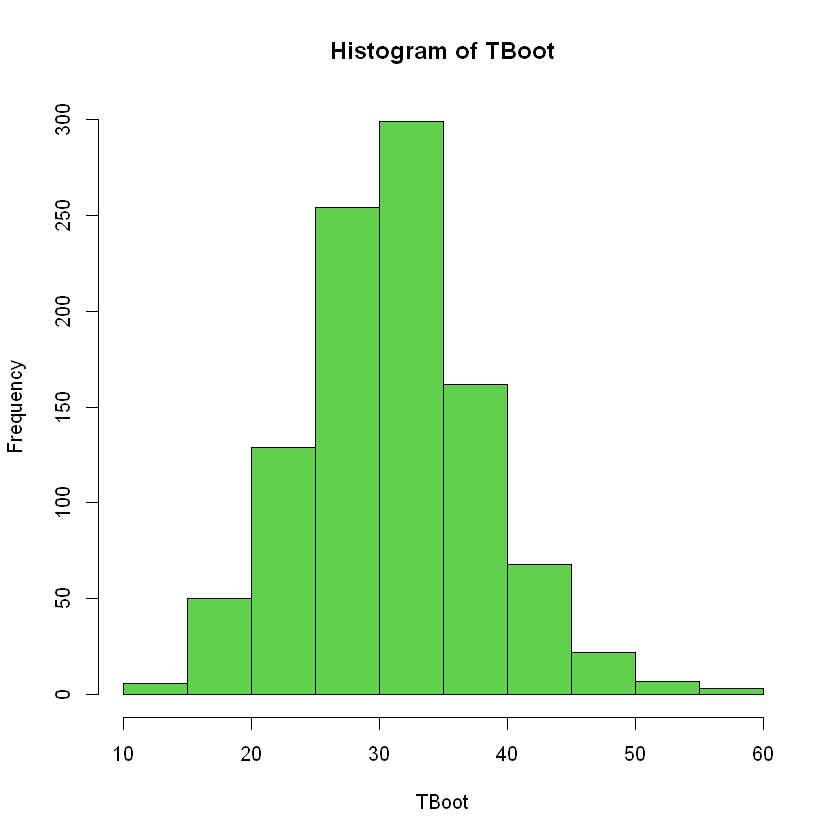

In [61]:
# 编写函数
zhixinqujia = function(data, x, alpha = 0.05){
    # 读入数据
    dta = as.numeric(unlist(data[,x]))

    # 顺序统计量的中位数置信区间
    n = length(dta)
    conf = pbinom(n,n,0.5)-pbinom(0,n,0.5)
    for (k in 1:n){
        conf = pbinom(n-k,n,0.5)-pbinom(k-1,n,0.5)
        if (conf<1-alpha){
            loc = k-1
            break
        }
    }

    dta.sort = sort(dta) 
    low = dta.sort[loc+1]
    up = dta.sort[n-loc]
    dta.median = median(dta)

    # 对称分布中用Walsh平均法求解置信区间
    plot(density(dta)) # 画图
    kks = ks.test(dta,pnorm,mean(dta),sd(dta)) # 正态分布检验
    print(kks)

    walsh = NULL
    for (i in 1:n){
        for (j in i:n){
            walsh = c(walsh,(dta[i]+dta[j])/2)
        }
    }
    nn = length(walsh)
    for (k in seq(1,nn/2,1)){
        F = pbinom(nn-k,nn,0.5) - pbinom(k-1,nn,0.5)
        if (F<1-alpha){
            loc2 = k-1
            break
        }
    }

    walsh.sort = sort(walsh) 
    low1 = walsh.sort[loc2+1]
    up1 = walsh.sort[nn-loc2]

    # 使用bootstrap方法对中位数进行重抽样
    TBoot = NULL
    n = 30 # 每次bootstrap的样本量
    B = 1000 # 次数
    SD.dta = NULL
    for (i in 1:B){
        Xsample = sample(dta, n, T)
        Tboot = median(Xsample)
        TBoot = c(TBoot,Tboot)
        SD.dta = c(SD.dta,sd(TBoot))
    }
    SD.median.dta = sd(TBoot)
    plot(1:B,SD.dta,col = 4) # 可以看到标准差大概是0.65
    hist(TBoot, col = 3) # 中位数的估计抽样分布的右偏分布


    low2 = dta.median+qnorm(alpha/2,0,1)* SD.median.dta
    up2 = dta.median-qnorm(alpha/2,0,1)* SD.median.dta

    # 枢轴量置信区间估计
    low3 = 2*dta.median-quantile(TBoot,1-alpha/2)
    up3 = 2*dta.median-quantile(TBoot,alpha/2)

    # 分位数置信区间估计
    low4 = quantile(TBoot,alpha/2)
    up4 = quantile(TBoot,1-alpha/2)

    # 结果汇总
    print(sprintf('| 真实的中位数 |     %0.2f    |',dta.median))
    print(sprintf('| 顺序统计量法 |(%0.2f, %0.2f)|',low,up))
    print(sprintf('| 沃什平均值法 |(%0.2f, %0.2f)|',low1,up1))
    print(sprintf('| 重采样正态法 |(%0.2f, %0.2f)|',low2,up2))
    print(sprintf('| 重采样枢轴量 |(%0.2f, %0.2f)|',low3,up3))
    print(sprintf('| 重采样分位数 |(%0.2f, %0.2f)|',low4,up4))
}

zhixinqujia(data,"H股")

### 结论
在五种中位数的置信区间的计算方法中，可以看到顺序统计量的分位数置信区间的精度最高，walsh平均法仅仅在较为严格的对称分布中才会显示出较高的精度；而在自助重采样方法中，枢轴量法的结果较其他两种更为精确。

进一步我们可以应用函数，对其他的数值型变量计算五种置信区间，或者更改置信水平alpha，观察计算方法是否robust以及alpha能否对walsh平均法的结果产生影响。